In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import imblearn
from imblearn.over_sampling import RandomOverSampler ,SMOTE
from imblearn.under_sampling import RandomUnderSampler , NearMiss
from collections import Counter    
from imblearn.over_sampling import RandomOverSampler ,SMOTE

In [482]:
df = pd.read_csv('1st raw data model.csv')

In [483]:
X = df[['ALUMINIUM','CHROMIUM', 'COPPER',  'MAGNESIUM', 'MANGANESE',
       'SILICON','ZINC','IRON','TITANIUM' ]]
y = df['strength']

In [484]:
import imblearn
from imblearn.over_sampling import RandomOverSampler ,SMOTE
from imblearn.under_sampling import RandomUnderSampler , NearMiss
from collections import Counter    

from imblearn.over_sampling import RandomOverSampler ,SMOTE
ros = RandomOverSampler(random_state = 10 )
X_resampled, y_resampled = ros.fit_resample (X,y)
print(sorted(Counter(X_resampled).items()), X_resampled.shape)

[('ALUMINIUM', 1), ('CHROMIUM', 1), ('COPPER', 1), ('IRON', 1), ('MAGNESIUM', 1), ('MANGANESE', 1), ('SILICON', 1), ('TITANIUM', 1), ('ZINC', 1)] (176, 9)


In [485]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_resampled, y_resampled, test_size=0.15, random_state= 101
                                                   
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [486]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [492]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 200,random_state = 70)
LL_rf = model.fit(X_train_scaled,y_train)



In [493]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score( model , X_train_scaled , y_train, scoring = 'r2' , 
                         cv = 4

array([0.91787735, 0.98697002, 0.92942349, 0.98338489])

In [494]:
scores.mean()

0.9544139373977814

In [495]:
from sklearn.model_selection import cross_val_score
scores_2 = cross_val_score(model , X_test_scaled , y_test, scoring = 'r2' , 
                         cv = 4
                        )
scores_2

array([0.85321015, 0.89286699, 0.90650317, 0.86957111])

In [496]:
scores_2.mean()

0.8805378564753931

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(23.875, 0.5, 'Testing')

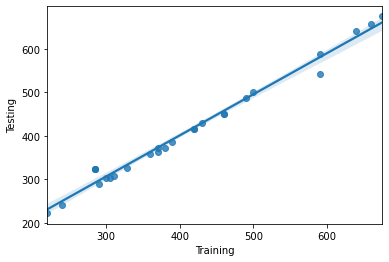

In [497]:
ypred = model.predict(X_test_scaled)

sns.regplot(y_test,ypred)
plt.savefig('1.jpg')
plt.xlabel('Training')
plt.ylabel('Testing')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(23.875, 0.5, 'Testing')

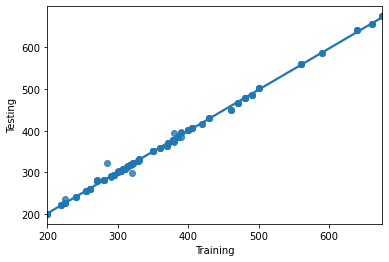

In [498]:
ypred_t = model.predict(X_train_scaled)

sns.regplot(y_train,ypred_t)
plt.savefig('1.jpg')
plt.xlabel('Training')
plt.ylabel('Testing')